# Test NO paramétricos:

Son aquellos test que **no** hacen supuestos sobre la distribución de los datos o varianzas iguales. En lugar de ello, `utilizan rangos o posiciones ordenadas` para hacer las comparaciones.

![img](img/img5.jpeg)

Estos tests son útiles cuando no se cumplen los supuestos requeridos para los tests paramétricos, como la normalidad, la homogeneidad de las varianzas o la independencia de las observaciones.

Algunos de los *test no paramétricos más comunes* son:

- **Prueba U de Mann-Whitney**: se utiliza para comparar las medianas de dos grupos independientes.

- **Prueba de Wilcoxon**: se utiliza para comparar las medianas de dos grupos pareados.

- **Prueba de Kruskal-Wallis**: se utiliza para comparar las medianas de tres o más grupos independientes.

- Prueba de Friedman: se utiliza para comparar las medianas de tres o más grupos pareados.


Los test no paramétricos no requieren los mismos supuestos que los test paramétricos, pero aún así tienen ciertas **consideraciones que deben ser tomadas en cuenta** al elegir y realizar la prueba. A continuación, se presentan algunos supuestos necesarios en algunos de los test no paramétricos más comunes:

- ***Independencia*** de los grupos comparados

- Las muestras se extraen de ***poblaciones*** con la ***misma forma de distribución***

- Provienen de poblaciones con ***la misma variabilidad***


## Prueba U de Mann-Whitney

El U-test es una prueba no paramétrica que se utiliza para comparar dos grupos independientes y determinar si las `medianas de ambas muestras son estadísticamente diferentes`.

**Hipótesis nula y alternativa:**

- H0: las medianas de ambos grupos son iguales

- H1: es que las medianas son diferentes

**Condiciones:**

- Las dos muestras deben ser independientes.

- Las variables a comparar son continuas u ordenadas.

- Las dos muestras deben ser extraídas de poblaciones con distribuciones de probabilidad similares.


> Comparar si las propinas dejadas a la hora de comer y a la de cenar difiere

- H0: no hay diferencia significativa entre las propinas a la hora de comer con las de la hora de cenar

- H1: hay diferencia significativa entre las propinas a la hora de comer con las de la hora de cenar


In [181]:
import seaborn as sns
from scipy.stats import mannwhitneyu

tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [186]:
propina_almuerzo = tips[tips["time"]=="Lunch"]["tip"]
propina_cena = tips[tips["time"]=="Dinner"]["tip"]

<AxesSubplot:xlabel='tip', ylabel='Count'>

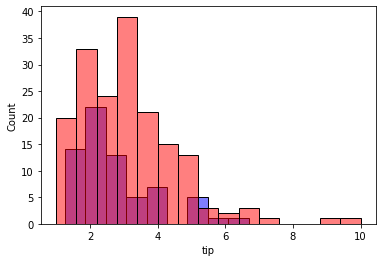

In [187]:
sns.histplot(propina_almuerzo, color='blue', alpha=0.5)
sns.histplot(propina_cena, color='red', alpha=0.5)

In [188]:
U, p_valor = mannwhitneyu(propina_almuerzo, propina_cena)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  4905.0
P-valor:  0.028828045676793167


In [189]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))


Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0288)


In [185]:
U, p_valor = mannwhitneyu(propina_almuerzo, propina_cena, alternative='less')

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))


Estadístico U:  4905.0
P-valor:  0.014414022838396583
Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0144)


> Propuesta: comparar si las propinas dejadas por hombres y mujeres difiere

- H0: no hay diferencia significativa entre las propinas dejadas por hombre en comparación con las dejadas por mujeres

- H1: hay diferencia significativa entre las propinas dejadas por hombre en comparación con las dejadas por mujeres

In [2]:
import seaborn as sns
from scipy.stats import mannwhitneyu

tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Codigo propuesta

## Prueba de Wilcoxon

Es una prueba no paramétrica que se utiliza para comparar `dos muestras relacionadas` o medidas repetidas en la misma unidad experimental.

**Hipótesis nula y alternativa:**

- H0: no hay diferencia significativa entre las medianas de las dos muestras relacionadas.

- H1: hay diferencia significativa entre las medianas de las dos muestras relacionadas.

**Condiciones:**

- Los datos deben ser pareados o relacionados.

- Los datos deben ser medidos en una escala ordinal, intervalar o de razón.

- Los pares de datos deben ser independientes entre sí.

> Comparar si los diamantes tienen mayor precio si se corta de una forma u otra

- HO: La mediana de las medidas del precio del diamante son iguales.

- H1: La mediana de las medidas del precio del diamante difiere significativamente.

In [ ]:
import seaborn as sns
import random
import numpy as np
from scipy.stats import wilcoxon

In [170]:
diamantes = sns.load_dataset('diamonds')
diamantes_fair = diamantes[diamantes.cut == 'Fair']['price']
diamantes_good = diamantes[diamantes.cut == 'Good']['price'][:len(diamantes_fair)]

In [171]:
len(diamantes_fair)==len(diamantes_good)

True

<AxesSubplot:xlabel='price', ylabel='Count'>

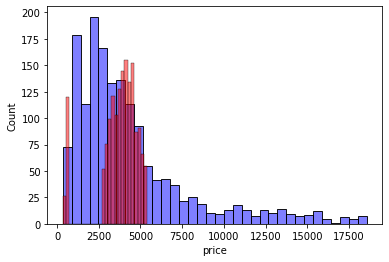

In [172]:
sns.histplot(diamantes_fair, color='blue', alpha=0.5)
sns.histplot(diamantes_good, color='red', alpha=0.5)

In [173]:
stat,p_valor = wilcoxon(diamantes_fair, diamantes_good,alternative="two-sided")
print("Estadístico: ", stat)
print("P-valor: ", p_valor)

Estadístico:  585198.5
P-valor:  0.0007015921176411246


In [174]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))


Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0007)


> Propuesta: comparar si la longitud de los sépalos se ve afectado de manera significativa después de un tratamiento aplicado

- HO: La mediana de las medidas de la longitud de los sépalos antes del tratamiento es igual a la mediana de las medidas después del tratamiento.

- H1: La mediana de las medidas de la `longitud de los sépalos después del tratamiento es mayor que la mediana de las medidas antes del tratamiento`.

In [ ]:
import seaborn as sns
import random
import numpy as np
from scipy.stats import wilcoxon

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
setosa = iris.loc[iris.species=='setosa']

sepalo_antes = iris.sepal_length.values

sepalo_despues = [random.gauss(5.6, 6.3) for i in range(len(sepalo_antes))]

In [ ]:
len(sepalo_antes)==len(sepalo_despues)

True

In [190]:
# Codigo propuesta

## Prueba de Kruskal-Wallis

La prueba de Kruskal-Wallis se utiliza para `comparar la distribución de dos o más muestras independientes de datos ordinales o continuos no paramétricos`.

**Hipótesis nula y alternativa:**

- H0: no hay diferencia significativa entre las medianas de los grupos.

- H1: al menos hay una mediana que es significativamente diferente de las demás.

**Condiciones:**

- Los datos deben ser independientes entre sí.

- Los datos deben ser ordinales o continuos no paramétricos.

- El número de observaciones debe ser suficientemente grande para permitir una evaluación precisa.


> Comparar si los diamantes tienen distinto precio según su corte

- HO: La mediana de las medidas del precio del diamante son iguales.

- H1: La mediana de las medidas del precio del diamante difiere significativamente.

In [193]:
import seaborn as sns
import random
import numpy as np
from scipy.stats import kruskal

In [197]:
diamantes = sns.load_dataset('diamonds')

In [215]:
stat, p_valor = kruskal(diamantes["price"][diamantes["cut"] == "Ideal"], 
                        diamantes["price"][diamantes["cut"] == "Premium"], 
                        diamantes["price"][diamantes["cut"] == "Very Good"], 
                        diamantes["price"][diamantes["cut"] == "Good"], 
                        diamantes["price"][diamantes["cut"] == "Fair"])

print("Estadístico: ", stat)
print("P-valor: ", p_valor)

Estadístico:  978.6208219359503
P-valor:  1.533414952159139e-210


In [216]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))


Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0000)


## Chi cuadrado

La prueba chi-cuadrado se utiliza para evaluar si hay una `asociación entre dos variables categóricas`. Para poder realizar esta prueba, es necesario que los datos estén en forma de tabla de contingencia, es decir, una tabla que muestra la frecuencia de cada combinación posible de las dos variables categóricas.

Además, se deben cumplir las siguientes *condiciones*:

- Las observaciones deben ser **independientes** entre sí.

- La muestra debe ser **aleatoria**.

- El **tamaño de la muestra** debe ser suficientemente grande para que las frecuencias esperadas sean al menos 5 en la mayoría de las celdas de la tabla de contingencia.

Si se cumplen estas condiciones, se puede realizar la prueba chi-cuadrado para evaluar si existe una asociación estadísticamente significativa entre las dos variables categóricas.

### Prueba de independencia chi-cuadrado:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

penguins = sns.load_dataset("penguins").dropna()
cross_tab = pd.crosstab(index = penguins.species, columns=penguins.sex)
cross_tab_matrix = np.array(cross_tab)

In [2]:
cross_tab

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [3]:
# Realizar la prueba chi-cuadrado
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(cross_tab_matrix)

# Mostrar los resultados
print("Estadístico chi-cuadrado:", estadistico)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Tabla de frecuencias esperadas:\n", esperados)

Estadístico chi-cuadrado: 0.04860717014078318
Valor p: 0.9759893689765846
Grados de libertad: 2
Tabla de frecuencias esperadas:
 [[72.34234234 73.65765766]
 [33.69369369 34.30630631]
 [58.96396396 60.03603604]]


In [7]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")


No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.


### Prueba de bondad del ajuste chi-cuadrado:

In [8]:
import seaborn as sns
from scipy.stats import chisquare

# Cargamos el dataset de los pingüinos
df = sns.load_dataset('penguins')

# Contamos el número de machos y hembras
n_machos = df['sex'].value_counts()[0]
n_hembras = df['sex'].value_counts()[1]

# Calculamos la proporción de machos y hembras esperada bajo una distribución aleatoria
proporcion_aleatoria = 0.5
n_total = n_machos + n_hembras
n_aleatoria_machos = n_total * proporcion_aleatoria
n_aleatoria_hembras = n_total * (1 - proporcion_aleatoria)

# Realizamos la prueba de bondad de ajuste chi-cuadrado
observados = [n_machos, n_hembras]
esperados = [n_aleatoria_machos, n_aleatoria_hembras]
estadistico, p_valor = chisquare(observados, f_exp=esperados)

print('Estadístico de prueba:', estadistico)
print('p-valor:', p_valor)

Estadístico de prueba: 0.02702702702702703
p-valor: 0.8694170607412391


In [10]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: la proporción de sexos NO es la misma que la esperada bajo una distribución aleatoria")
else:
    print("No se puede rechazar la hipótesis nula: la proporción de sexos es la misma que la esperada bajo una distribución aleatoria.")


No se puede rechazar la hipótesis nula: la proporción de sexos es la misma que la esperada bajo una distribución aleatoria.
